In [2]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

loading the dataframe

In [3]:
df = pd.read_csv(r"f_ds.csv")
X = df.drop(['av_training_set', 'tce_plnt_num', 'tce_rogue_flag', 'kepid', 'tce_insol', 'tce_insol_err'], axis='columns')
Y = df.av_training_set

creating a train test split

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

creating a base model using SVC and checking its accuracy

In [5]:
svc = SVC()
svc.fit(X_train.values, Y_train)
svc.score(X_test.values, Y_test)

0.4663333333333333

accuracy comes out to be 46.633 %


Now we will standardize the data

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [7]:
svc = SVC()
svc.fit(X_train_scaled.values, Y_train)
svc.score(X_test_scaled.values, Y_test)

0.6256666666666667

New accuracy is 62.566%

we can also remove useless features to reduce training time and also maintain the accuracy

feature_correlation
# correlation heatmap

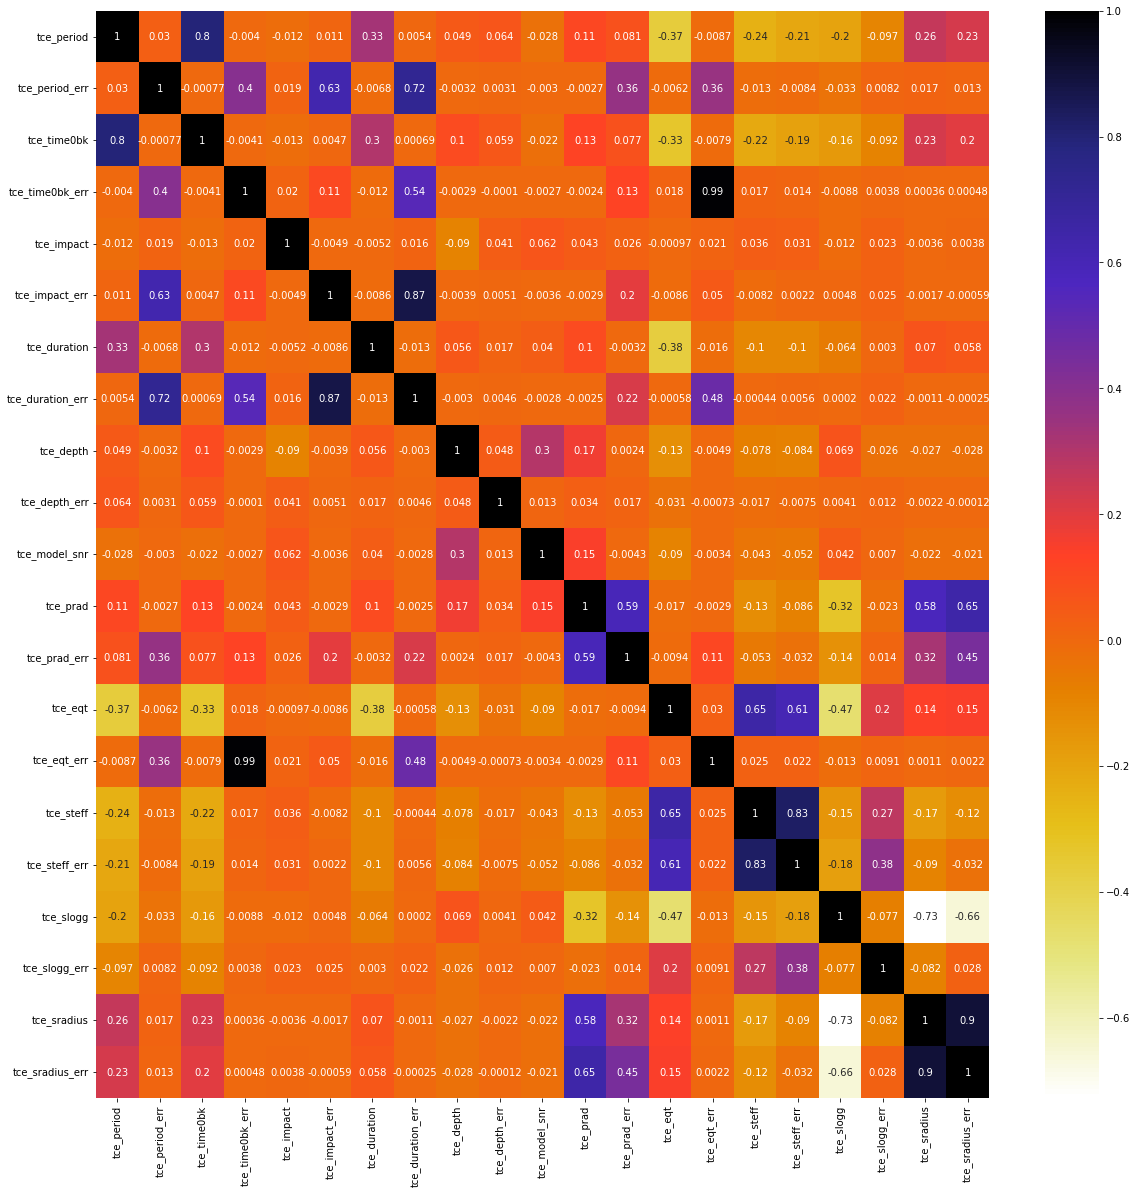

In [8]:
plt.figure(figsize=(20, 20))
cor = X_train_scaled.corr() #pearson correlation
sb.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [9]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


corr_features = correlation(X_train_scaled, 0.85)
corr_features

{'tce_duration_err', 'tce_eqt_err', 'tce_sradius_err'}

In [10]:
X3_train = X_train_scaled.drop(corr_features, axis='columns')
X3_test = X_test_scaled.drop(corr_features, axis='columns')

In [11]:
model = SVC(kernel='rbf')
model.fit(X3_train.values, Y_train)
print(model.score(X3_test.values, Y_test))

0.6253333333333333


Text(33.0, 0.5, 'Truth')

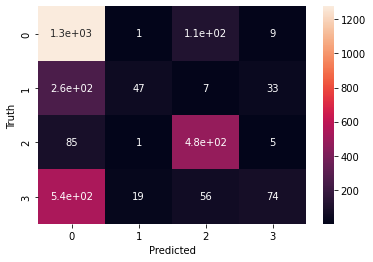

In [12]:
y_predicted = model.predict(X3_test.values)
cm = confusion_matrix(Y_test, y_predicted)
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
#afp = 0
#ntp = 1
#pc = 2
#unk = 3

# bagging ensemble
it doesnt produe good results.

In [ ]:
bag = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    random_state=42,
    n_jobs = -1,
    verbose =1

)

In [ ]:
bag.fit(X3_train.values,Y_train)
print(bag.score(X3_test.values, Y_test))

# voting ensemble
it also doesnt increase accuracy

In [79]:
X_scaled = scaler.transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)

In [80]:
estimators = [('rf',RandomForestClassifier()),('svc',SVC())]
for estimator in estimators:
    x = cross_val_score(estimator[1],X3_train.values, Y_train, cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

rf 0.65
svc 0.62


In [82]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=estimators,voting='hard',n_jobs=-1,verbose=1)
x = cross_val_score(vc,X3_train.values, Y_train,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.62
